# DATA CLEANING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/UNIGAP/Python/Project 3/ecommerce retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
'''
CustomerID bị missing --> bỏ luôn những dòng đó
Description bị missing --> k ảnh hưởng vì đang phân tích RFM
datatype của CustomerID là float --> string
'''

'\nCustomerID bị missing --> bỏ luôn những dòng đó\nDescription bị missing --> k ảnh hưởng vì đang phân tích RFM\ndatatype của CustomerID là float --> string\n'

In [ ]:
# remove CustomerID bị missing
data = data.dropna(subset=['CustomerID'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
# convert customerid floats to strings
data['CustomerID'] = data['CustomerID'].astype(str)

In [ ]:
#Kiểm tra lại Missing Values
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,406829.000000,406829,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-31 11:48:00,1.950000
75%,12.000000,2011-10-20 13:06:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.693370,NaN,69.315162


In [ ]:
data = data[data['Quantity'] > 0]
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,397924.000000,397924,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:33:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,180.420210,NaN,22.096788


Để EDA thì cần thêm một số cột:  months, days, hours...

In [ ]:
# Adding Years, Months, Days, Hours, and Date
data['Years'] = data['InvoiceDate'].dt.year
data['Months'] = data['InvoiceDate'].dt.month
data['Days'] = data['InvoiceDate'].dt.dayofweek+1
data['Hours'] = data['InvoiceDate'].dt.hour
data['Date'] = data['InvoiceDate'].dt.date
data['DayOfMonth'] = data['InvoiceDate'].dt.day

#Sắp xếp lại dataset
data = data[['InvoiceNo',  'InvoiceDate', 'Date', 'Years', 'Months',
             'Days','Hours','DayOfMonth','StockCode', 'Description',
             'Quantity', 'UnitPrice', 'CustomerID', 'Country']]

data.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [ ]:
#Adding Total Cost
data.insert(loc = 14, column = 'TotalCost', value = data['Quantity']*data['UnitPrice'])
data.head()

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


# EDA

1. Tháng nào có Oders và Revenue cao nhất?
2. Ngày nào trong tuần có Oders và Revenue cao nhất?
3. Đơn hàng được thực hiện nhiều nhất vào giờ nào?
4. Ngày nào có revenue cao nhất?
5. Mỗi quốc gia có revenue như thế nào?



## 1. Tháng nào có Oders và Revenue cao nhất?

In [ ]:
print("Bộ dữ liệu chứa thông tin đơn hàng từ {} đến {}".format(data['Date'].unique()[0], data['Date'].unique()[-1]))


Bộ dữ liệu chứa thông tin đơn hàng từ 2010-12-01 đến 2011-12-09


In [ ]:
ord_rev_month = pd.DataFrame({'Order': data.groupby('InvoiceNo')['Months'].unique().value_counts().sort_index(),
                              'Revenue' : data.groupby('Months')['TotalCost'].sum()})
ord_rev_month

,Order,Revenue
Months,,
[1],987,569445.040
[2],998,447137.350
[3],1321,595500.760
[4],1149,469200.361
[5],1555,678594.560
[6],1393,661213.690
[7],1331,600091.011
[8],1281,645343.900
[9],1756,952838.382


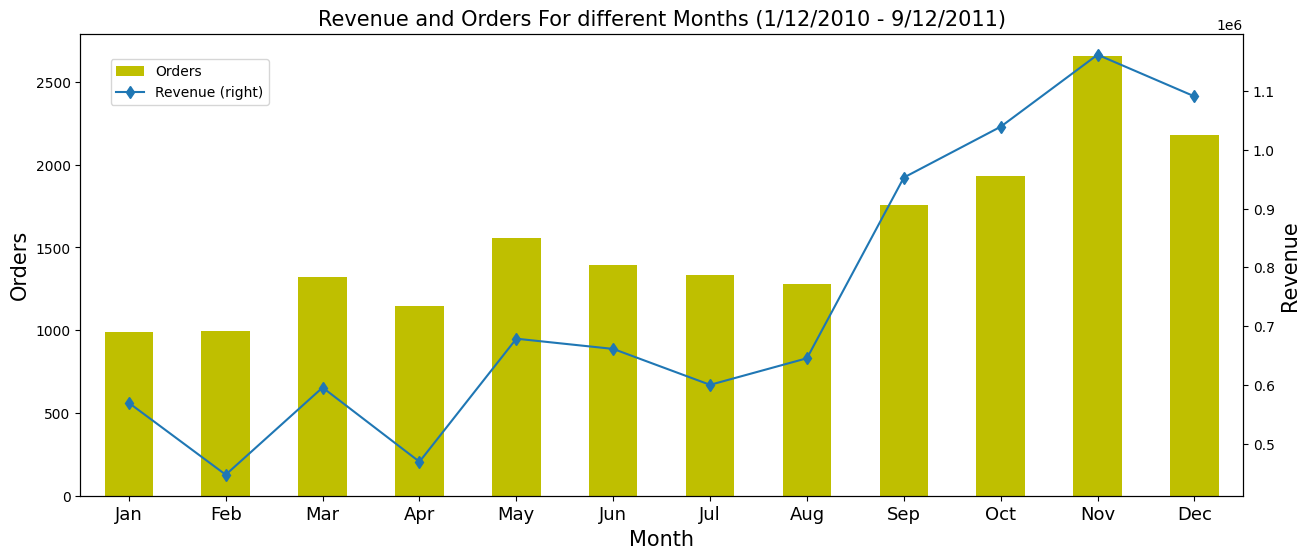

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_month['Order'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_month['Revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')

ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For different Months (1/12/2010 - 9/12/2011)',fontsize=15)

ax1.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

## 2. Ngày nào trong tuần có Oders và Revenue cao nhất?

In [ ]:
ord_rev_day = pd.DataFrame({'Order': data.groupby('InvoiceNo')['Days'].unique().value_counts().sort_index(),
                            'Revenue' : data.groupby('Days')['TotalCost'].sum()})
ord_rev_day

,Order,Revenue
Days,,
[1],2863,1367146.411
[2],3185,1700634.631
[3],3455,1588336.170
[4],4033,1976859.070
[5],2831,1485917.401
[7],2169,792514.221


-> Thứ 7 không có data?

In [ ]:
data[data['Days'] == 6].count()

InvoiceNo      0
InvoiceDate    0
Date           0
Years          0
Months         0
Days           0
Hours          0
DayOfMonth     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
TotalCost      0
dtype: int64

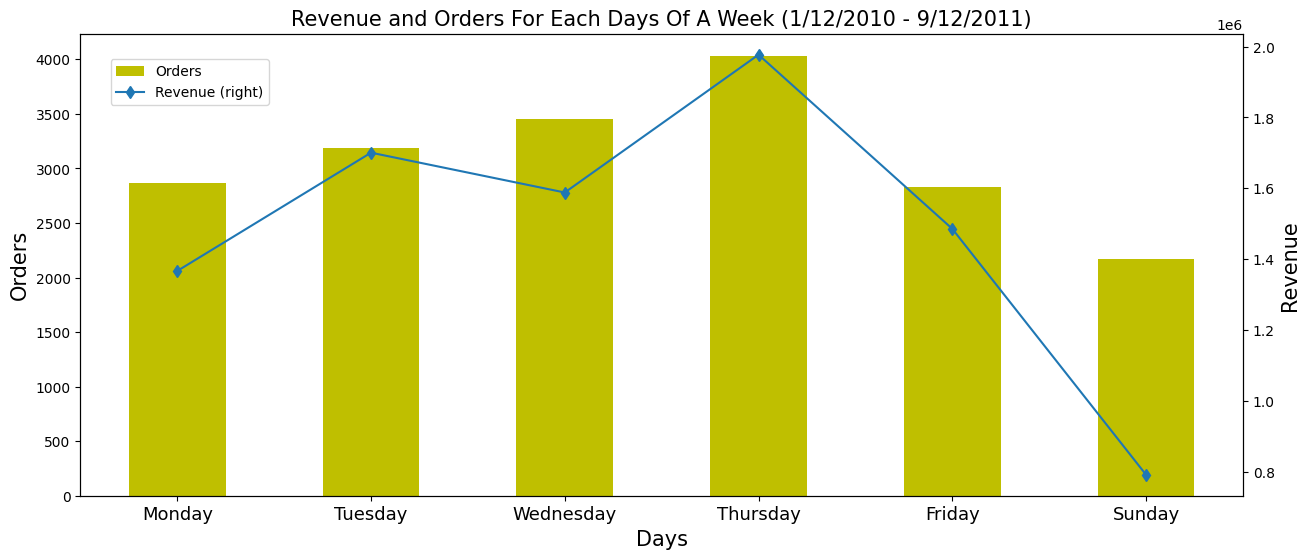

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_day['Order'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_day['Revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')

ax1.set_xlabel('Days',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For Each Days Of A Week (1/12/2010 - 9/12/2011)',fontsize=15)

ax1.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Sunday'), rotation='horizontal', fontsize=13)
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

-> Thứ 6 & CN có Oders và Revenue thấp hơn cả thứ 5

## 3. Đơn hàng được thực hiện nhiều nhất vào giờ nào?

In [ ]:
data['Hours'].describe()

count    397924.000000
mean         12.728247
std           2.273535
min           6.000000
25%          11.000000
50%          13.000000
75%          14.000000
max          20.000000
Name: Hours, dtype: float64

In [ ]:
ord_rev_hour = pd.DataFrame({'Order': data.groupby('Hours')['InvoiceNo'].nunique().sort_index(),
                             'Revenue' : data.groupby('Hours')['TotalCost'].sum()})
ord_rev_hour

,Order,Revenue
Hours,,
6,1,4.250
7,29,31059.210
8,555,282115.630
9,1394,842605.171
10,2226,1261192.571
11,2277,1104558.750
12,3130,1378571.480
13,2637,1173264.750
14,2275,995629.371


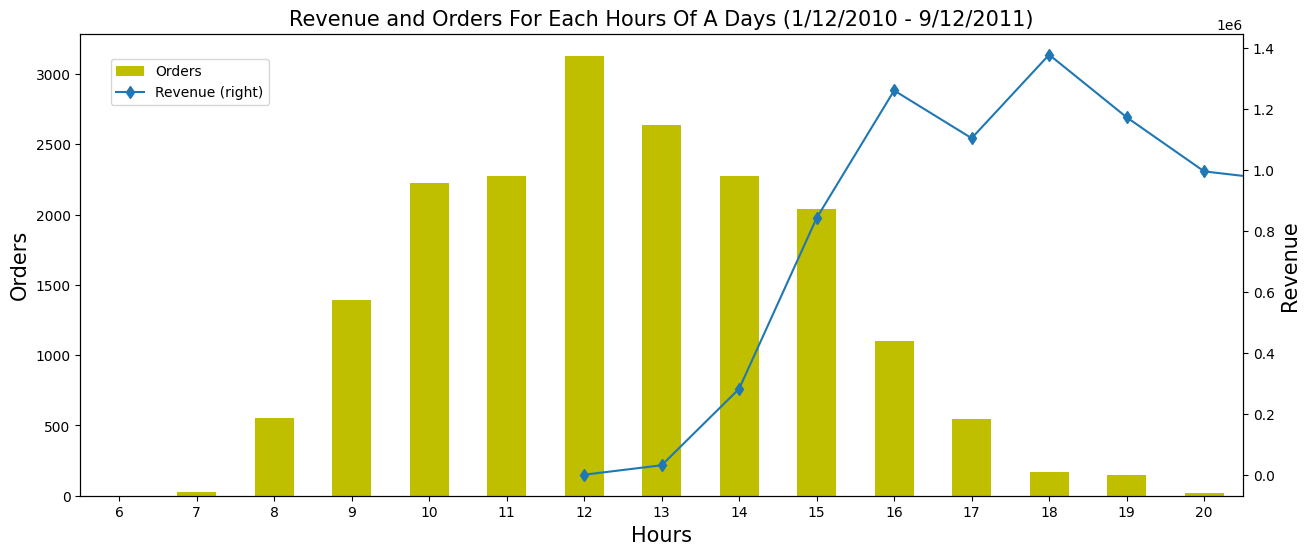

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = ord_rev_hour['Order'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_hour['Revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')

ax1.set_xlabel('Hours',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For Each Hours Of A Days (1/12/2010 - 9/12/2011)',fontsize=15)

fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

## 4. Ngày nào có revenue cao nhất?

In [ ]:
ord_rev_date = pd.DataFrame({'Order': data.groupby('InvoiceNo')['DayOfMonth'].unique().value_counts().sort_index(),
                             'Revenue' : data.groupby('DayOfMonth')['TotalCost'].sum()})
ord_rev_date

,Order,Revenue
DayOfMonth,,
[1],709,286370.870
[2],613,256858.750
[3],520,285430.150
[4],629,329347.220
[5],723,354033.810
[6],801,336759.840
[7],773,376788.980
[8],771,296747.450
[9],660,460216.080


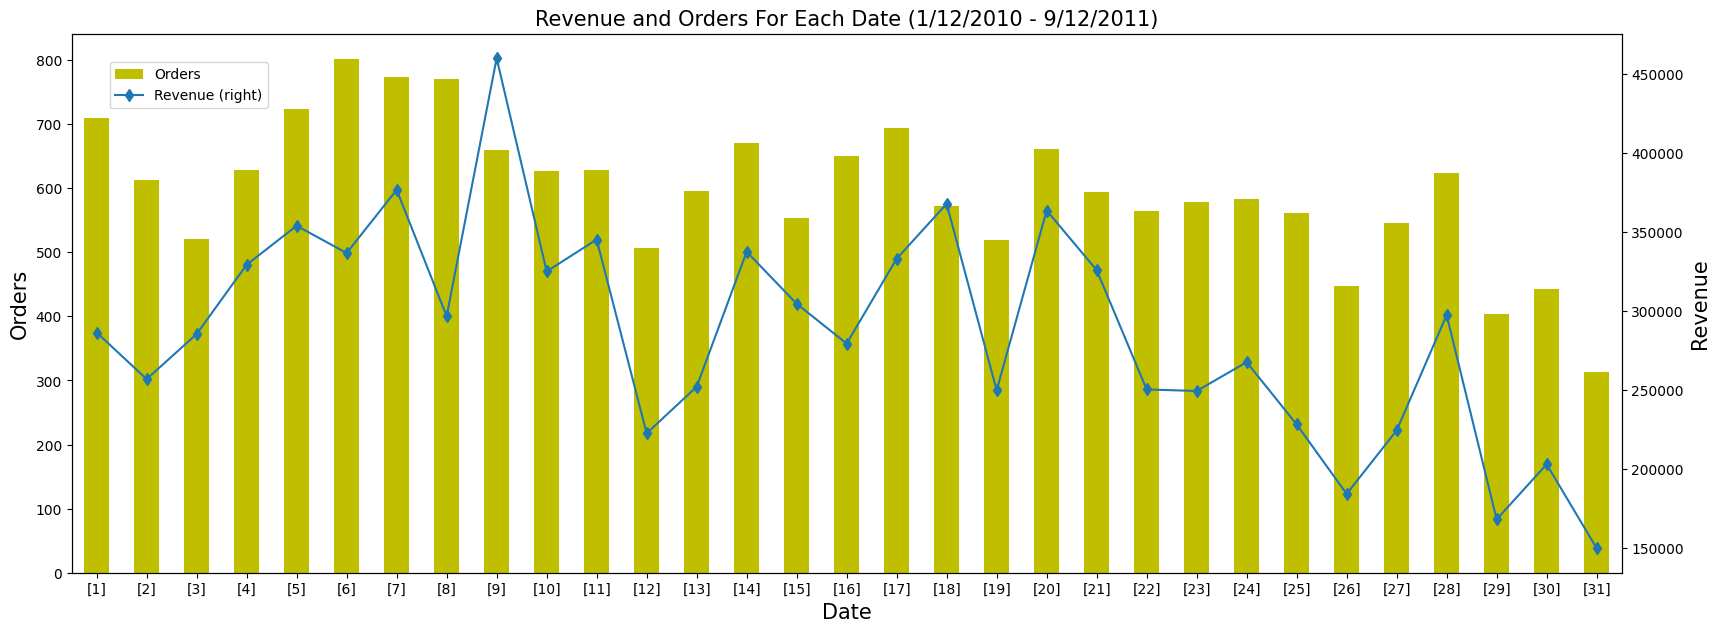

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 7))
ax1 = ord_rev_date['Order'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_date['Revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')

ax1.set_xlabel('Date',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
ax1.set_title('Revenue and Orders For Each Date (1/12/2010 - 9/12/2011)',fontsize=15)

fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

## 5. Mỗi quốc gia có revenue như thế nào?

In [ ]:
print("Số quốc gia có trong dataset : ", data['Country'].nunique())
data['Country'].unique()

Số quốc gia có trong dataset :  37


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
ord_rev_country = pd.DataFrame({'Order': data.groupby('InvoiceNo')['Country'].unique().value_counts().sort_index(),
                               'Revenue': data.groupby('Country')['TotalCost'].sum()})
ord_rev_country.sort_values(by='Order', ascending=False).head()

,Order,Revenue
Country,,
[United Kingdom],16649,7308391.554
[Germany],457,228867.140
[France],389,209024.050
[EIRE],260,265545.900
[Belgium],98,41196.340


In [ ]:
ord_rev_country['Percentage'] = (ord_rev_country['Revenue']/ord_rev_country['Revenue'].sum())*100
ord_rev_country.sort_values(by='Percentage', ascending=False).head(10)

,Order,Revenue,Percentage
Country,,,
[United Kingdom],16649,7308391.554,82.011638
[Netherlands],95,285446.340,3.203156
[EIRE],260,265545.900,2.979842
[Germany],457,228867.140,2.568249
[France],389,209024.050,2.345578
[Australia],57,138521.310,1.554427
[Spain],90,61577.110,0.690992
[Switzerland],51,56443.950,0.633390
[Belgium],98,41196.340,0.462288


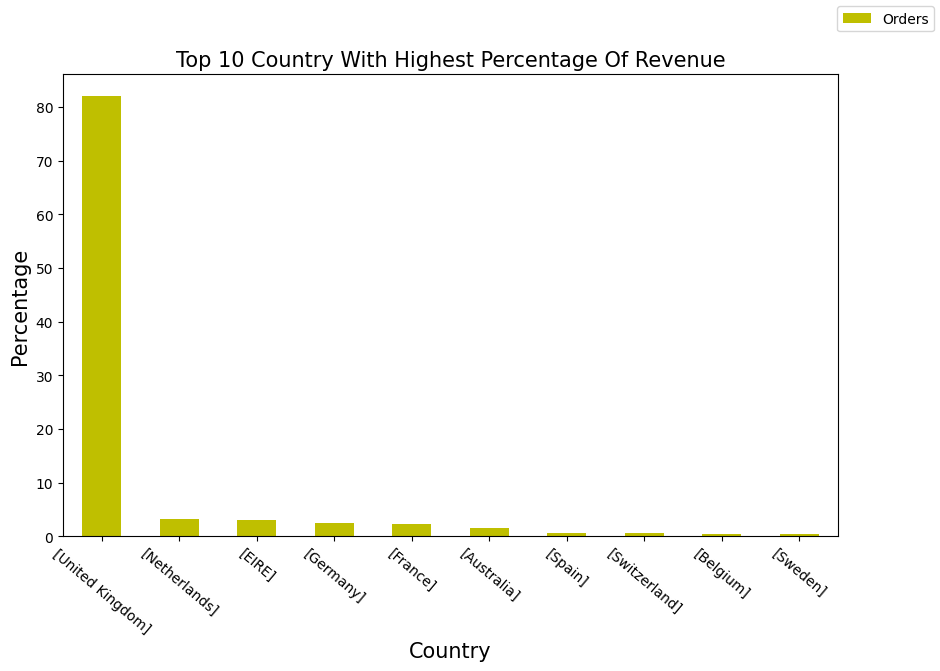

In [ ]:
top_ten = ord_rev_country.sort_values(by='Percentage', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(10, 6))
top_ten['Percentage'].plot(kind='bar', color='y', label='Orders')
ax1.set_ylabel('Percentage',fontsize=15)
ax1.set_xlabel('Country',fontsize=15)
plt.xticks(rotation=(365-45))
ax1.set_title('Top 10 Country With Highest Percentage Of Revenue',fontsize=15)

fig.legend(loc="upper right", bbox_transform=ax1.transAxes)
plt.show()

# RFM

## Recency

In [ ]:
# group by customer by last date they purchased
recency_df = data.groupby(['CustomerID'], as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
# Ngày tính của chỉ số R tính vào ngày 31/12/2011
import datetime as dt
now = dt.datetime(2011, 12, 31)
#
recency_df['LastPurchaseDate'] = pd.to_datetime(recency_df['LastPurchaseDate'])

#calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,347
1,12347.0,2011-12-07,24
2,12348.0,2011-09-25,97
3,12349.0,2011-11-21,40
4,12350.0,2011-02-02,332


In [ ]:
#Xóa cột LastPurchaseDate
recency_df = recency_df.drop('LastPurchaseDate', axis=1)
recency_df.head()

,CustomerID,Recency
0,12346.0,347
1,12347.0,24
2,12348.0,97
3,12349.0,40
4,12350.0,332


## Frequecy

In [ ]:
# group by customerid để đếm số đơn hàng của họ
frequency_df = data.groupby('CustomerID',as_index=False)['InvoiceNo'].nunique()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## Monetary

In [ ]:
monetary_df=data.groupby('CustomerID',as_index=False)['TotalCost'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## RFM score

In [ ]:
# join 3 bảng lại
rf = recency_df.merge(frequency_df,left_on='CustomerID',right_on='CustomerID')
rfm = rf.merge(monetary_df,left_on='CustomerID',right_on='CustomerID')
rfm.set_index('CustomerID',inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40


In [ ]:
#RFM score
rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels=[5,4,3,2,1]).astype(str)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method = 'first'), q=5, labels=[1,2,3,4,5]).astype(str)
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1,2,3,4,5]).astype(str)

rfm['rfm_score'] = rfm['R_score'] + rfm['F_score'] + rfm['M_score']

rfm.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,rfm_score
CustomerID,,,,,,,
12346.0,347,1,77183.60,1,1,5,115
12347.0,24,7,4310.00,5,5,5,555
12348.0,97,4,1797.24,2,4,4,244
12349.0,40,1,1757.55,4,1,4,414
12350.0,332,1,334.40,1,1,2,112


In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,114.041484,4.271952,2053.793018
std,100.007757,7.705493,8988.248381
min,22.000000,1.000000,0.000000
25%,39.000000,1.000000,307.245000
50%,72.000000,2.000000,674.450000
75%,163.500000,5.000000,1661.640000
max,395.000000,210.000000,280206.020000


- Có 4339 khách hàng
- Khách hàng trung bình đã không mua hàng trong khoảng 114 ngày (Recency), mua hàng trung bình 4 lần (Frequency) và chi tiêu trung bình 2053.79 (Monetary)


In [ ]:
rfm['rfm_score'].describe()

count     4339
unique     117
top        555
freq       348
Name: rfm_score, dtype: object

In [ ]:
rfm

,Recency,Frequency,Monetary,R_score,F_score,M_score,rfm_score
CustomerID,,,,,,,
12346.0,347,1,77183.60,1,1,5,115
12347.0,24,7,4310.00,5,5,5,555
12348.0,97,4,1797.24,2,4,4,244
12349.0,40,1,1757.55,4,1,4,414
12350.0,332,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...
18280.0,299,1,180.60,1,2,1,121
18281.0,202,1,80.82,1,2,1,121
18282.0,29,2,178.05,5,3,1,531


## Segment

In [ ]:
segment = pd.read_excel('/content/drive/MyDrive/UNIGAP/Python/Project 3/segment.xlsx')
segment.head(20)

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [ ]:
segment['RFM Score'] = segment['RFM Score'].str.split(',')
segmentt = segment.explode('RFM Score').reset_index(drop = True)
#segmentt.set_index('RFM Score',inplace=True)
segmentt

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [ ]:
rfm = rfm.reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,rfm_score
0,12346.0,347,1,77183.60,1,1,5,115
1,12347.0,24,7,4310.00,5,5,5,555
2,12348.0,97,4,1797.24,2,4,4,244
3,12349.0,40,1,1757.55,4,1,4,414
4,12350.0,332,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280.0,299,1,180.60,1,2,1,121
4335,18281.0,202,1,80.82,1,2,1,121
4336,18282.0,29,2,178.05,5,3,1,531
4337,18283.0,25,16,2094.88,5,5,5,555


In [ ]:
seg = rfm.merge(segmentt, how='left', left_on= 'rfm_score', right_on='RFM Score')
seg

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,rfm_score,Segment,RFM Score
0,12346.0,347,1,77183.60,1,1,5,115,Cannot Lose Them,115
1,12347.0,24,7,4310.00,5,5,5,555,Champions,555
2,12348.0,97,4,1797.24,2,4,4,244,NaN,NaN
3,12349.0,40,1,1757.55,4,1,4,414,Promising,414
4,12350.0,332,1,334.40,1,1,2,112,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,299,1,180.60,1,2,1,121,NaN,NaN
4335,18281.0,202,1,80.82,1,2,1,121,NaN,NaN
4336,18282.0,29,2,178.05,5,3,1,531,NaN,NaN
4337,18283.0,25,16,2094.88,5,5,5,555,Champions,555


In [ ]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   object 
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
 4   R_score     4339 non-null   object 
 5   F_score     4339 non-null   object 
 6   M_score     4339 non-null   object 
 7   rfm_score   4339 non-null   object 
 8   Segment     736 non-null    object 
 9   RFM Score   736 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 339.1+ KB


In [ ]:
rfm_full = pd.read_excel('/content/drive/MyDrive/UNIGAP/Python/Project 3/rfm_full.xlsx')
rfm_full.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,rfm_score,seg
0,12346,347,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347,24,7,4310.00,5,5,5,555,Champions
2,12348,97,4,1797.24,2,4,4,244,At Risk
3,12349,40,1,1757.55,4,1,4,414,Promising
4,12350,332,1,334.40,1,1,2,112,Lost customers


In [ ]:
rfm_full['seg'].unique()

array(['Cannot Lose Them', 'Champions', 'At Risk', 'Promising',
       'Lost customers', 'Loyal', 'Hibernating customers',
       'New Customers', 'Need Attention', 'Potential Loyalist',
       'About To Sleep'], dtype=object)

# RFM Analysis

## 1. Mỗi segment có bao nhiêu KH?

In [ ]:
import plotly.express as px
# RFM Segment Distribution
segment_counts = rfm_full['seg'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'number_of_customer']
segment_counts

,Segment,number_of_customer
0,Champions,835
1,Hibernating customers,695
2,Lost customers,486
3,Loyal,428
4,At Risk,423
5,Potential Loyalist,413
6,About To Sleep,283
7,Need Attention,281
8,New Customers,268
9,Promising,136


In [ ]:
# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Segment', y='number_of_customer',
                          color='Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                          title='Number of Customer for each segment')
# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Customer Segment',
                              yaxis_title='Number_of_customer',
                              showlegend=False)
# Show the figure
fig_segment_dist.show()

## 2. Mỗi segment có revenue như nào?

In [ ]:
ord_rev_seg = pd.DataFrame({"Order" :rfm_full.groupby('seg')['Frequency'].sum(),
                            "Revenue" : rfm_full.groupby('seg')['Monetary'].sum()})

ord_rev_seg

,Order,Revenue
seg,,
About To Sleep,363,77885.540
At Risk,1592,752061.261
Cannot Lose Them,208,203671.300
Champions,10117,5604376.680
Hibernating customers,1079,285420.302
Lost customers,518,97405.610
Loyal,2277,1021224.390
Need Attention,872,463778.001
New Customers,287,59755.620


In [ ]:
fig = px.pie(ord_rev_seg['Revenue'],
             values=ord_rev_seg['Revenue'].values,
             names=ord_rev_seg['Revenue'].index,
             title="Segment Contribution by Revenue",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")

fig.show()

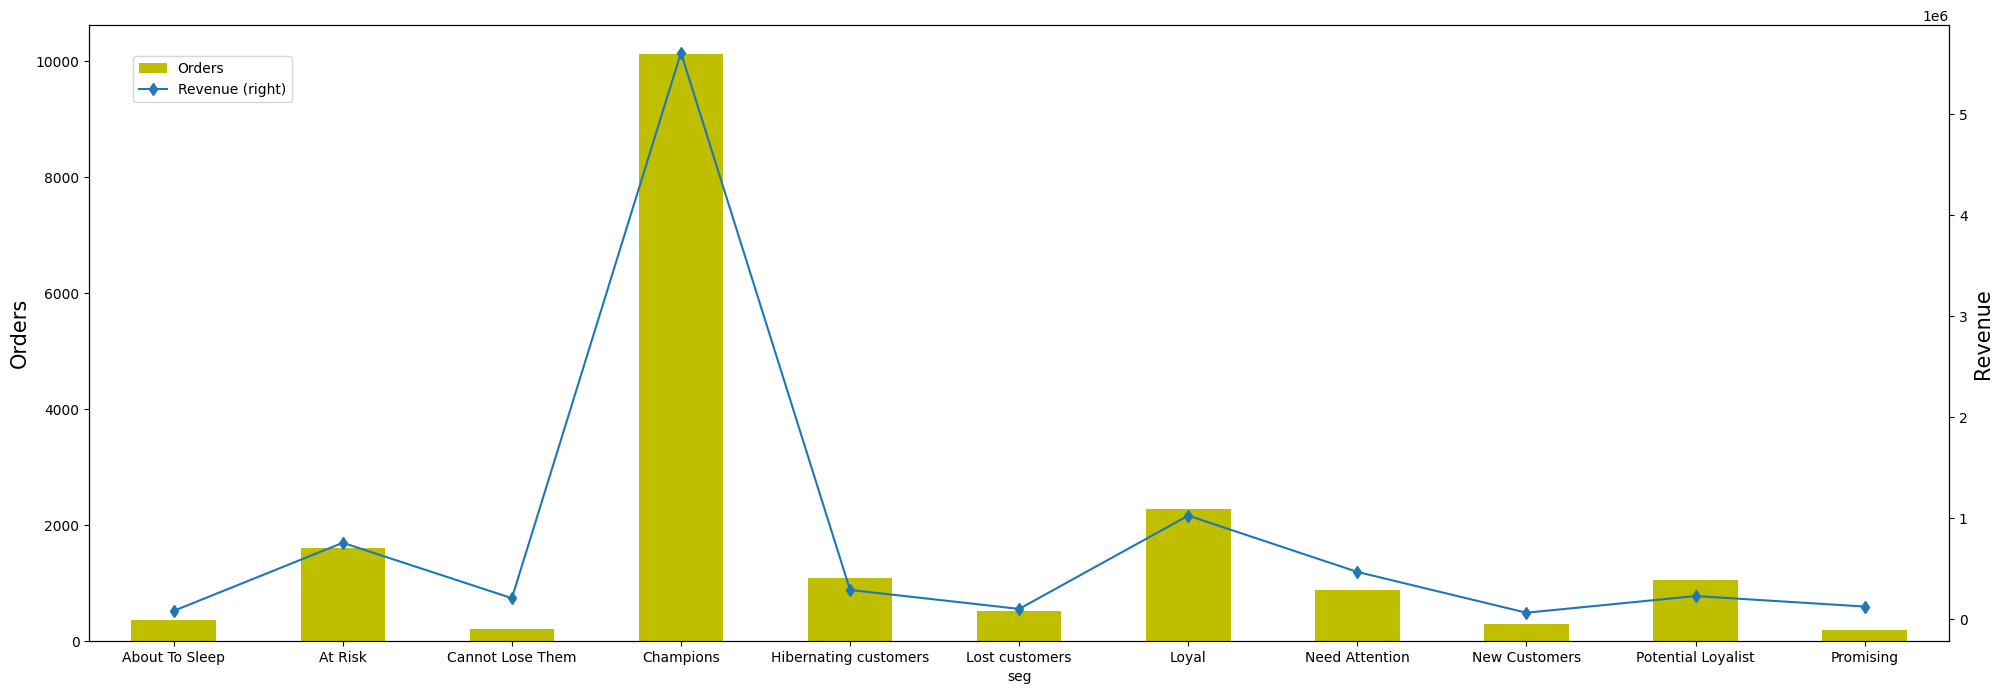

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 8))
ax1 = ord_rev_seg['Order'].plot(kind='bar', color='y', label='Orders')
ax2 = ord_rev_seg['Revenue'].plot(kind='line', marker='d', secondary_y=True, label = 'Revenue')

ax1.set_ylabel('Orders',fontsize=15)
ax2.set_ylabel('Revenue',fontsize=15)
#ax1.set_title('Revenue and Orders For different Months (1/12/2010 - 9/12/2011)',fontsize=15)

#ax1.set_xticklabels(rotation='horizontal')
fig.legend(loc="upper left", bbox_to_anchor=(0.02,0.96), bbox_transform=ax1.transAxes)
plt.show()

- Nhóm Champions là nhóm khách hàng có giá trị nhất, với tần suất mua hàng và chi tiêu cao nhất.
- Nhóm Loyal, At Risk, Hibernating customers, Need Attention, Potential Loyalist: là những nhóm khách hàng có giá trị trung bình và có tiềm năng tăng trưởng.
- Nhóm còn lại là những nhóm khách hàng có giá trị thấp và cần được quan tâm để cải thiện hoặc duy trì.

## 3. Các segment thường order khi nào?

In [ ]:
rfm_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   int64  
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
 4   R_score     4339 non-null   int64  
 5   F_score     4339 non-null   int64  
 6   M_score     4339 non-null   int64  
 7   rfm_score   4339 non-null   int64  
 8   seg         4339 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 305.2+ KB


In [ ]:
print(data['CustomerID'].dtype)
print(rfm_full['CustomerID'].dtype)

object
int64


In [ ]:
rfm_full['CustomerID'] = rfm_full['CustomerID'].astype(str)
data['CustomerID'] = data['CustomerID'].astype(float)
data['CustomerID'] = data['CustomerID'].astype(int)
data['CustomerID'] = data['CustomerID'].astype(str)

data

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20
541905,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60
541906,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60
541907,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60


In [ ]:
#
merged_df = pd.merge(data, rfm_full[['CustomerID', 'seg']], on='CustomerID', how='left')

#
data_seg = merged_df[data.columns.tolist() + ['seg']]
data_seg

,InvoiceNo,InvoiceDate,Date,Years,Months,Days,Hours,DayOfMonth,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalCost,seg
0,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,Cannot Lose Them
1,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,Cannot Lose Them
2,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,Cannot Lose Them
3,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,Cannot Lose Them
4,536365,2010-12-01 08:26:00,2010-12-01,2010,12,3,8,1,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,Cannot Lose Them
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,10.20,Loyal
397920,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,Loyal
397921,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,Loyal
397922,581587,2011-12-09 12:50:00,2011-12-09,2011,12,5,12,9,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,Loyal


ví dụ lấy ra 3 phân khúc khách hàng có nhiều KH nhất:
- Champions
- Hibernating customers
- Lost customers

In [ ]:
hours_seg = pd.DataFrame({'Champions': data_seg[data_seg['seg']== 'Champions'].groupby('Hours')['InvoiceNo'].nunique(),
                          'Hibernating customers': data_seg[data_seg['seg']== 'Hibernating customers'].groupby('Hours')['InvoiceNo'].nunique(),
                          'Lost customers': data_seg[data_seg['seg']== 'Lost customers'].groupby('Hours')['InvoiceNo'].nunique()})
hours_seg

,Champions,Hibernating customers,Lost customers
Hours,,,
7,16,NaN,2.0
8,290,31.0,13.0
9,776,93.0,41.0
10,1261,112.0,60.0
11,1313,116.0,55.0
12,1746,180.0,76.0
13,1360,160.0,82.0
14,1187,140.0,72.0
15,1085,124.0,56.0


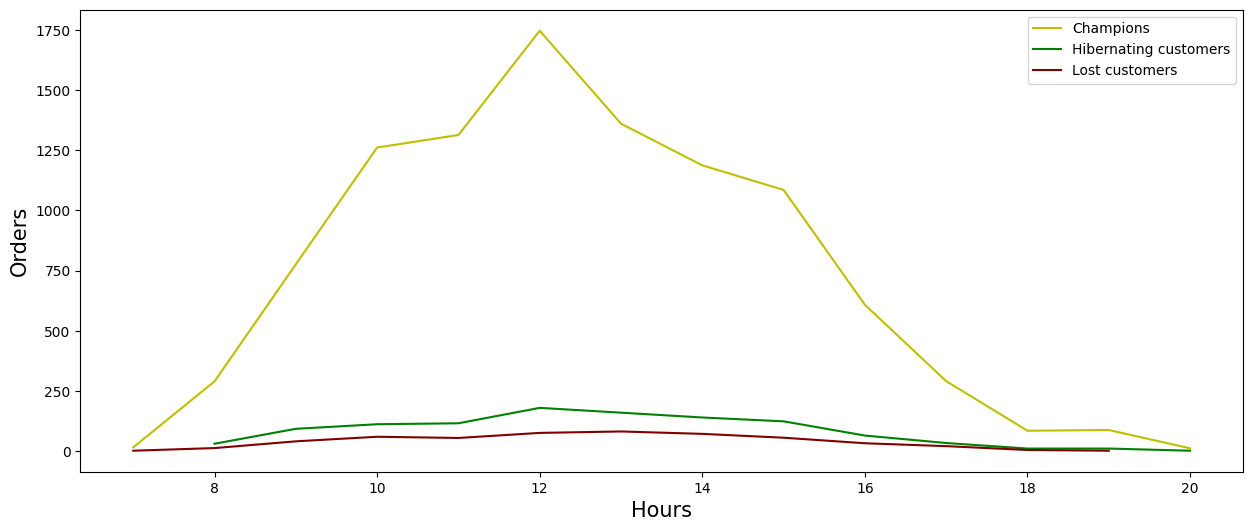

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = hours_seg['Champions'].plot(kind='line', color='y', label='Champions')
ax2 = hours_seg['Hibernating customers'].plot(kind='line', color='g', label='Hibernating customers')
ax3 = hours_seg['Lost customers'].plot(kind='line', color='maroon', label='Lost customers')

ax1.set_xlabel('Hours',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
plt.legend()

plt.show()

In [ ]:
month_seg = pd.DataFrame({'Champions': data_seg[data_seg['seg']== 'Champions'].groupby('Months')['InvoiceNo'].nunique(),
                          'Hibernating customers': data_seg[data_seg['seg']== 'Hibernating customers'].groupby('Months')['InvoiceNo'].nunique(),
                          'Lost customers': data_seg[data_seg['seg']== 'Lost customers'].groupby('Months')['InvoiceNo'].nunique()})
month_seg

,Champions,Hibernating customers,Lost customers
Months,,,
1,533,56,62.0
2,515,66,68.0
3,685,100,106.0
4,595,69,82.0
5,840,69,82.0
6,754,114,33.0
7,718,121,NaN
8,716,108,NaN
9,940,179,NaN


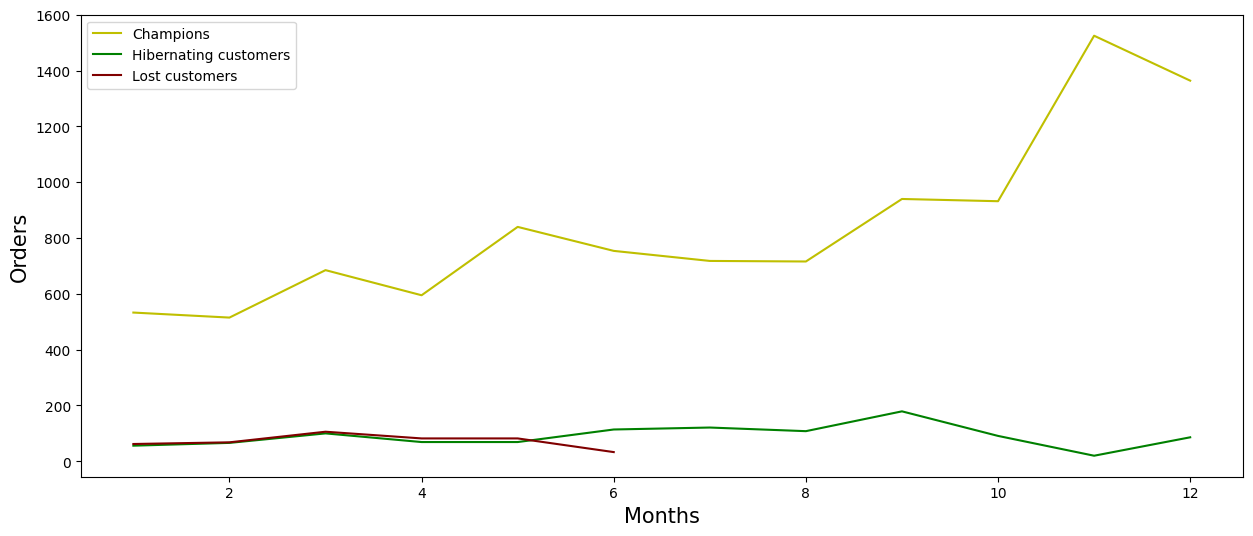

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1 = month_seg['Champions'].plot(kind='line', color='y', label='Champions')
ax2 = month_seg['Hibernating customers'].plot(kind='line', color='g', label='Hibernating customers')
ax3 = month_seg['Lost customers'].plot(kind='line', color='maroon', label='Lost customers')

ax1.set_xlabel('Months',fontsize=15)
ax1.set_ylabel('Orders',fontsize=15)
plt.legend()

plt.show()

## Gợi ý

Với 3 chỉ số R-F-M thì chỉ số F (Frequency) là quan trọng nhất vì đốii với mô hình bán lẻ, tần suất mua hàng của khách hàng cho thấy mức độ thường xuyên họ tương tác với cửa hàng và mua sản phẩm. Việc tập trung vào việc tăng tần suất mua hàng của khách hàng sẽ giúp tăng doanh thu và lợi nhuận cho công ty.